In [1]:
# !pip install sklearn
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install missingno

### Aubert Maël, Daria Taha, Curinier Augustin, Mauduit Paul - SD201 

In [2]:
import sklearn as sk
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans


In [3]:
data = pd.read_csv('train.csv')

C:\Users\Augustin\AppData\Local\Temp\ipykernel_39164\2815211952.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


In [4]:
data = data.iloc[:50000]

In [5]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Data overviewing

We take a first look at our data, see the format of the features, find the outliers

First we remove the features that won't be useful : Name, SSN

In [6]:
data = data.drop(columns =['Name', 'SSN'])

We see that for a given customer (same Customer_ID), there are some values that are constant

Those include : Age (except if birthday), Occupation, Annual_Income, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Type_of_Loan, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt,Payment_of_Min_Amount, Total_EMI_per_month

In [7]:
data.iloc[0:15,: 20]

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
0,0x1602,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months
1,0x1603,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN
2,0x1604,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months
3,0x1605,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months
4,0x1606,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months
5,0x1607,CUS_0xd40,June,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months
6,0x1608,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months
7,0x1609,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN
8,0x160e,CUS_0x21b1,January,28_,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months
9,0x160f,CUS_0x21b1,February,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months


We see that some values are not formated correctly, let's check the columns' type

In [8]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

We have to convert some columns to numeric 

In [9]:
cols_num = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
           'Amount_invested_monthly', 'Monthly_Balance'] #Columns to be converted

data[cols_num] = data[cols_num].apply(pd.to_numeric, errors='coerce') #Convert to float

data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

We can use missingno library to visualize missing date before cleaning it

<AxesSubplot:>

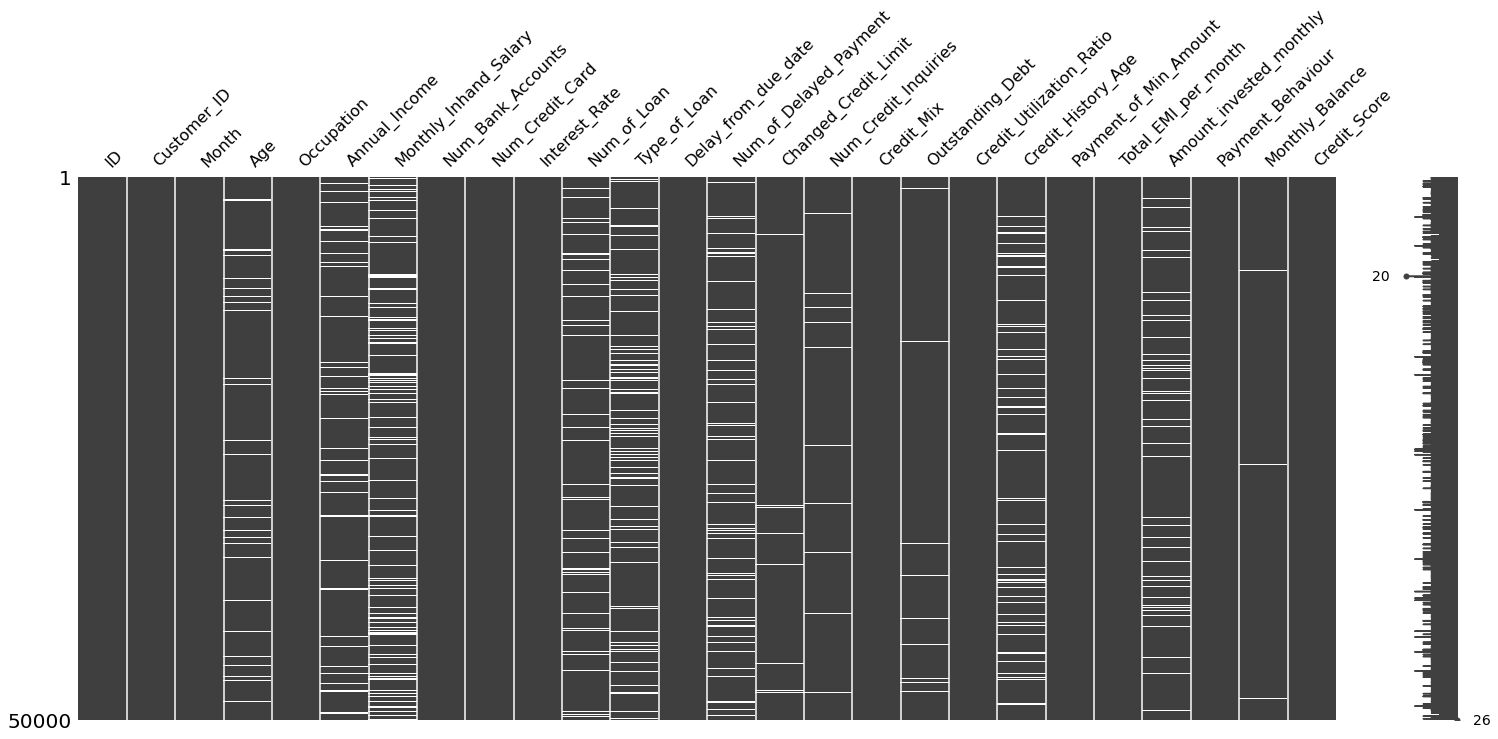

In [10]:
msno.matrix(data)

We know search for outliers

For exemple for age, we see that there are values over 100 and lower than 0, we will have to remove them while cleaning

C:\Users\Augustin\AppData\Local\Temp\ipykernel_39164\585942754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


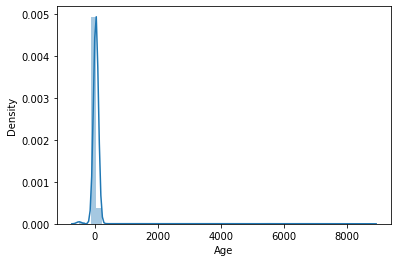

In [11]:
sns.distplot(data['Age'])
plt.show()

<AxesSubplot:>

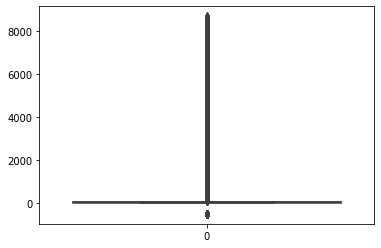

In [12]:
sns.boxplot(data['Age'])

In [13]:
((data['Age'] >= 100) | (data['Age'] <= 0)).value_counts()

False    48672
True      1328
Name: Age, dtype: int64

We do the same for the annual income

One of the methods we used to visualize the outliers is the boxplots. Indeed, as in this example, we notice that the box is almost not apparent. This implies that there are very extreme values to remove. So, we will use this diagram in our cleaning, trying to keep only the values in the boxes and whiskers.

C:\Users\Augustin\AppData\Local\Temp\ipykernel_39164\413689872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual_Income'])


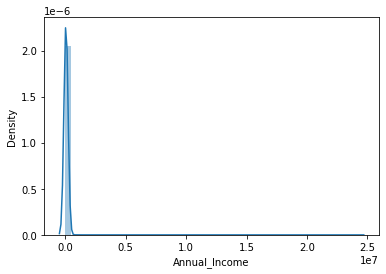

<AxesSubplot:>

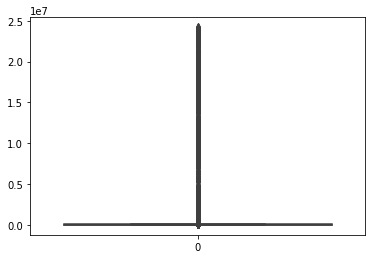

In [14]:
sns.distplot(data['Annual_Income'])
plt.show()
(data['Annual_Income'] >= 2.5e5).value_counts()
sns.boxplot(data['Annual_Income'])


We could have directly removed a percentage of the most extreme values but we chose to use the boxplot to make sure that these values are really detached from our data. Let's imagine for example if all the age data was correct. By deleting the 5% of the most extreme age data, we would have deleted the data of the elderly without any reason, even though this data is very important to correctly predict the credit score of an elderly person. On the other hand, using the boxplot, we would have realized that none of the age data should be deleted. 

We do the same for the other numerical features : here are our threshold values

In [15]:
print((data['Num_Credit_Card'] > 15).value_counts())
print((data['Interest_Rate'] > 50).value_counts())
print(((data['Num_of_Loan'] > 40) | (data['Num_of_Loan'] < 0)).value_counts())
print(((data['Delay_from_due_date'] > 62) | (data['Delay_from_due_date'] < 0)).value_counts())
print((data['Num_Bank_Accounts'] > 15).value_counts())
print((data['Num_Credit_Inquiries'] > 1e2).value_counts())
print(((data['Num_of_Delayed_Payment'] > 1e3) | (data['Num_of_Delayed_Payment'] < 0)).value_counts())


False    48864
True      1136
Name: Num_Credit_Card, dtype: int64
False    48996
True      1004
Name: Interest_Rate, dtype: int64
False    47925
True      2075
Name: Num_of_Loan, dtype: int64
False    49591
True       409
Name: Delay_from_due_date, dtype: int64
False    49359
True       641
Name: Num_Bank_Accounts, dtype: int64
False    49209
True       791
Name: Num_Credit_Inquiries, dtype: int64
False    49416
True       584
Name: Num_of_Delayed_Payment, dtype: int64


# Data cleaning

There are some features whose values are constant for a fixed customer, so if there are missing or wrongly formatted values for those ones, we can fill them.

After identifying "fixed" features for a customer, we remove the rows that are wrongly formatted.

We convert to numeric the columns that need to be, we keep only the years for the Credit_History_Age

In [16]:
#Removing errors
data.loc[data['Occupation'] == '_______', 'Occupation'] = np.nan
data.loc[data['Credit_Mix'] == '_', 'Credit_Mix'] = np.nan
data.loc[(data['Payment_of_Min_Amount'] == 'NM') , 'Payment_of_Min_Amount'] = np.nan 
data['Payment_Behaviour']=data.loc[(data['Payment_Behaviour'] != '!@9#%8') & pd.notnull(data['Payment_Behaviour']) , 'Payment_Behaviour']

data['Credit_History_Age'] = data['Credit_History_Age'].str.split().str[0] #Keeping only the year
data['Credit_History_Age'] = pd.to_numeric(data['Credit_History_Age'],errors='coerce')#Converting history age to float


Once we have our numerical columns, we remove outliers.

We drop rows we won't be able to fill.

We fill the missing rows using information of the customer from the rows around

In [17]:
cols_fil = ['Occupation','Annual_Income','Age','Num_of_Loan','Outstanding_Debt', 'Num_Bank_Accounts', 'Interest_Rate','Credit_Mix',
            'Num_Credit_Inquiries', 'Payment_of_Min_Amount','Num_Credit_Card', 'Total_EMI_per_month'] #Columns to fill

#Removing outliers
data.loc[(data['Age'] > 100) | (data['Age'] < 0), 'Age'] = np.nan  
data.loc[data['Annual_Income'] > 2.5e5, 'Annual_Income'] = np.nan  
data.loc[data['Num_Bank_Accounts'] > 15, 'Num_Bank_Accounts'] = np.nan  
data.loc[data['Num_Credit_Card'] > 15, 'Num_Credit_Card'] = np.nan  
data.loc[data['Interest_Rate'] > 50, 'Interest_Rate'] = np.nan  
data.loc[(data['Num_of_Loan'] > 40) | (data['Num_of_Loan'] < 0), 'Num_of_Loan'] = np.nan
data.loc[(data['Delay_from_due_date'] > 62) | (data['Delay_from_due_date'] < 0), 'Delay_from_due_date'] = np.nan  
data.loc[data['Num_Credit_Inquiries'] > 1e2, 'Num_Credit_Inquiries'] = np.nan  
data.loc[(data['Num_of_Delayed_Payment'] < 0)|(data['Num_of_Delayed_Payment'] > 1e3) , 'Num_of_Delayed_Payment'] = np.nan 

# #Dropping rows which can't be filled
# data=data[pd.notna(data['Num_of_Delayed_Payment'])]
# data=data[pd.notna(data['Payment_Behaviour'])]

#Filling rows using customer's information around
data[cols_fil] = data.groupby('Customer_ID')[cols_fil].transform(lambda v: v.ffill()).transform(lambda v: v.bfill())

We now drop the colum Type of loan, because we have not dealt with it yet and we also drop NaN values
We didn't deal with Type_of_loan because it was complex to treat with its format

In [18]:
data = data.drop(columns ='Type_of_Loan')
data = data.dropna()

We display the missingno matrix : there is no missing values left

<AxesSubplot:>

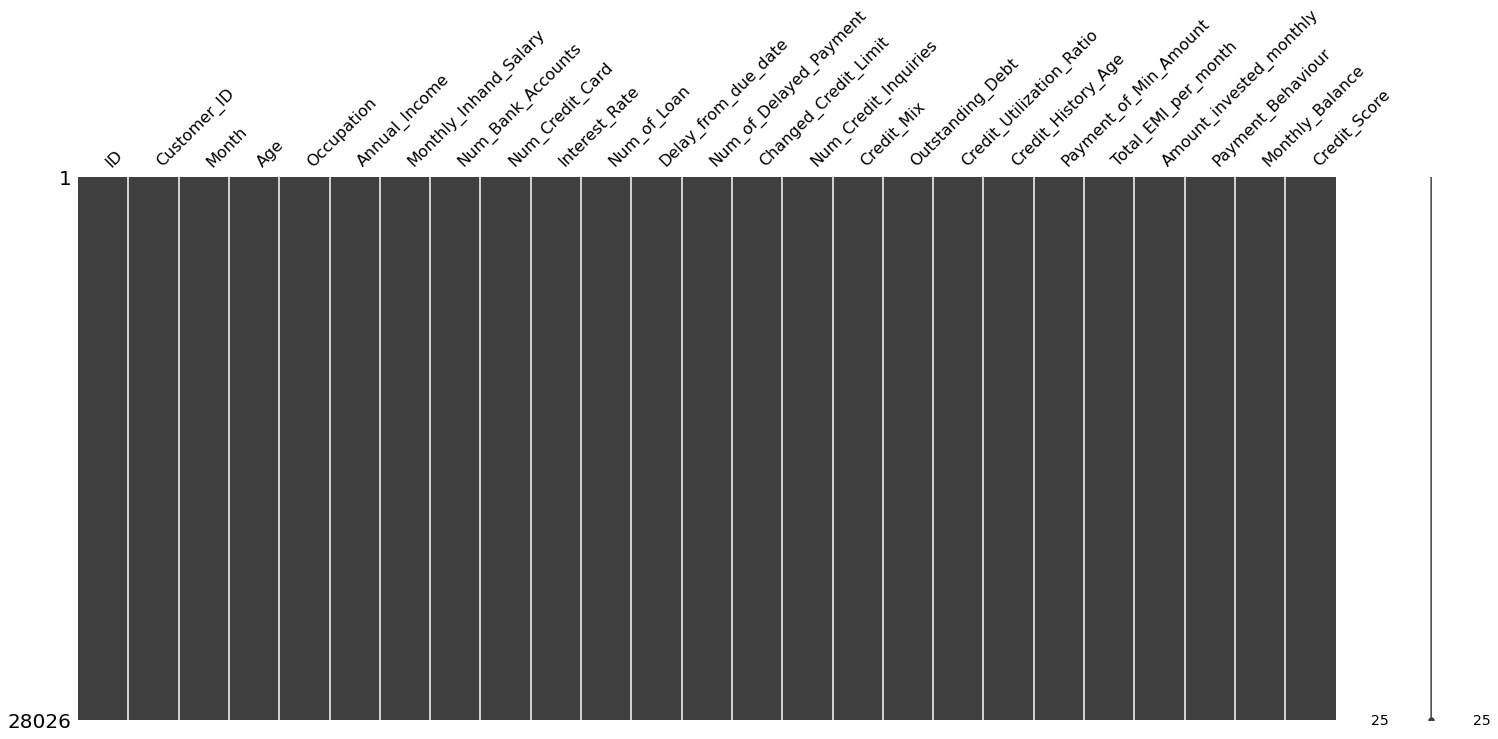

In [19]:
msno.matrix(data)

### Categorical values

We have to encode our categorical values. To do so :
 
- We manually map the credit score and month (there is sense to keeping an order)
- We use one-hot encoding for Payment_of_Min_Amount and Credit_Mix because it can only take few values
- We use ordinal encoder for Occupation and Payment_Behaviour (too much values for one-hot encoding)


In [20]:
#Manual mapping
data['Credit_Score'] = data['Credit_Score'].map({'Poor':1, 'Standard':2, 'Good':3})
data['Month'] = data['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 
                                         'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

#One-hot encoding
data = pd.get_dummies(data, columns = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour','Occupation'])

#OrdinalEncoder 
enc = OrdinalEncoder()
# data[['Occupation','Payment_Behaviour']] = enc.fit_transform(data[['Occupation','Payment_Behaviour']])

Now, we can try to analyze the correlation between all the columns of our dataset to see if we have columns that are too correlated. Thus, we can take only one of these columns as representative. This analysis will not take into account the columns Credit_Score, Credit_Mix_Bad, Credit_Mix_Good, Credit_Mix_Standard because the columns correlated with these columns are important for the work that follows.

<AxesSubplot:>

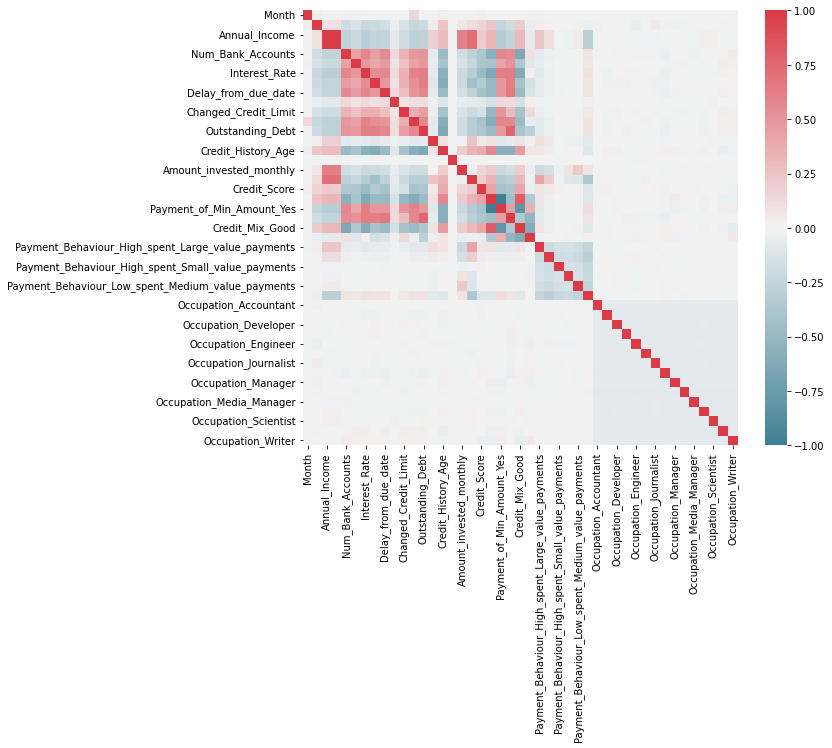

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [22]:
corr.where(abs(corr) > 0.75)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
Month,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,NaN,NaN,1.000000,0.998149,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,NaN,NaN,0.998149,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Bank_Accounts,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Credit_Card,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest_Rate,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delay_from_due_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_Delayed_Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We notice that we have no columns correlated at more than 0.75 except for Annual_Income and Monthly_Inhand_Salary. This is consistent with the fact that Annual_Income is just Monthly_Inhand_Salary multiplied by 12. We decide to delete Annual_Income and keep only Monthly_Inhand_Salary.

Now we focus on the analysis of the correlation of different columns with the credit score column. Our goal is to predict the credit score. Thus, the columns that will be used for our prediction are those that have a significant correlation in absolute value with the credit score column.

In [23]:
corr['Credit_Score'].where(abs(corr['Credit_Score']) > 0.1 )

Month                                                      NaN
Age                                                   0.159735
Annual_Income                                         0.211863
Monthly_Inhand_Salary                                 0.208869
Num_Bank_Accounts                                    -0.377633
Num_Credit_Card                                      -0.387758
Interest_Rate                                        -0.478741
Num_of_Loan                                          -0.345741
Delay_from_due_date                                  -0.421551
Num_of_Delayed_Payment                                     NaN
Changed_Credit_Limit                                 -0.161197
Num_Credit_Inquiries                                 -0.409659
Outstanding_Debt                                     -0.380922
Credit_Utilization_Ratio                                   NaN
Credit_History_Age                                    0.388053
Total_EMI_per_month                                    

In [24]:
data = data.drop(columns =['Num_of_Delayed_Payment','Total_EMI_per_month','Credit_Utilization_Ratio'])


We also drop columns we no longer need

In [25]:
data = data.drop(columns = ['ID','Customer_ID'])

In [26]:
data['mnth_sin'] = np.sin((data.Month-1)*(2.*np.pi/12))
data['mnth_cos'] = np.cos((data.Month-1)*(2.*np.pi/12))
data.head()


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,mnth_sin,mnth_cos
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,11.27,...,0,0,0,0,0,1,0,0,0.000000,1.000000
8,1,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,5.42,...,0,0,0,0,0,0,1,0,0.000000,1.000000
9,2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,7.42,...,0,0,0,0,0,0,1,0,0.500000,0.866025
12,5,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,6.42,...,0,0,0,0,0,0,1,0,0.866025,-0.500000
13,6,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,5.42,...,0,0,0,0,0,0,1,0,0.500000,-0.866025


In [27]:
data = data.drop(columns = ['Month'])

# Data visualization

We see that those with the lowest credit score, also have the lowest income. They are also the ones with the higher delay from due date

<Figure size 1296x432 with 0 Axes>

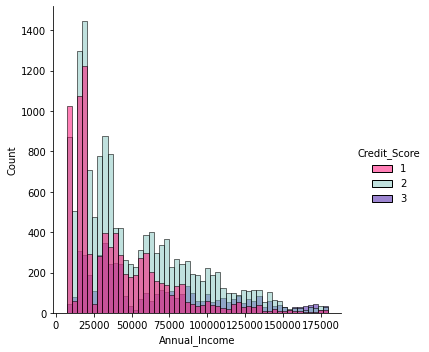

<Figure size 1296x432 with 0 Axes>

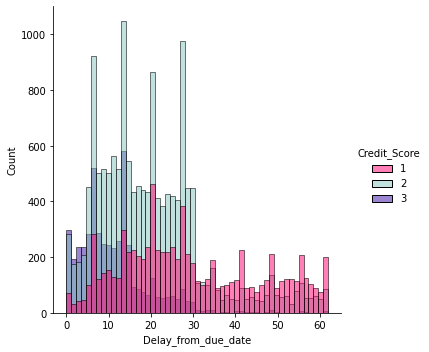

In [28]:
numCols = ['Annual_Income', 'Delay_from_due_date']

for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=data, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

<AxesSubplot:>

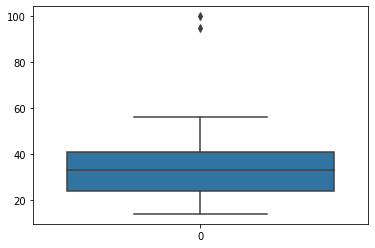

In [29]:
sns.boxplot(data['Age'])

<AxesSubplot:>

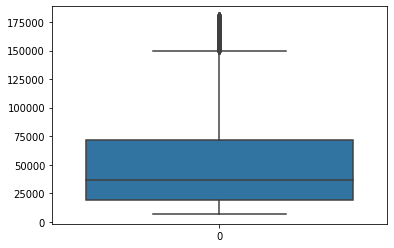

In [30]:
sns.boxplot(data['Annual_Income'])

We observe that we have reached the desired shape of the boxplots

# Data modeling

## Classification

In this section, we are going to try to classify the data according to the target attribute 'Credit_Score' that has been encoded the following way: 

'Poor' = 1 ; 'Standard' = 2; 'Good' = 3 .
To do so, we are going to use several algorithms and compare their accuracy thanks to some evaluation tools (confusion matrix, F1 Score) and try to find out which one is the best.
In order: Random Forest, k-nearest neighbours, decision trees, SVC (do not work),gradient boosting, bagging.

In [31]:
from sklearn.preprocessing import StandardScaler

object= StandardScaler()

 
dfmodel = data.copy()

# Splitting the independent and dependent variables
x = dfmodel.drop(['Credit_Score'] , axis = 1).values
y = dfmodel['Credit_Score' ].values
 
# # standardization 
# scale = object.fit_transform(x) 
# print(scale)

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)


### Random Forest

Let's try with some parameters first

In [32]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini',oob_score = True)
rf.fit(x_train , y_train)

y_pred = rf.predict(x_test)

We can display the confusion matrix, to observe the predictions

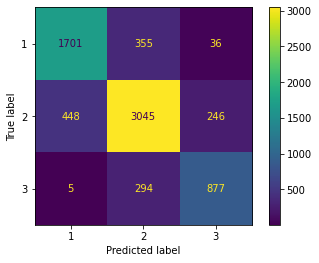

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

We compute the f1-score

In [34]:
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

0.790573888076937
0.8024832310546596
0.8024806234811791


We use GridSearchCV to find the best hyperparameters
It is a bit long to run due to the size of our dataset

In [35]:
param_grid = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

C:\Users\Augustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Augustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Augustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}

the best combination of parameters for the Random Forest Classifier is criterion = gini, max_features = auto, n_estimators = 100.


In [63]:
rfc1=RandomForestClassifier(max_features='sqrt', n_estimators= 150, criterion='entropy')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
print(f1_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='micro'))
print(f1_score(y_test, pred, average='weighted'))

0.7942890595551199
0.8054802340516626
0.8054023749211293


In [64]:
rfc1=RandomForestClassifier(max_features='auto', n_estimators= 100, criterion='gini')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
print(f1_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='micro'))
print(f1_score(y_test, pred, average='weighted'))

C:\Users\Augustin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7899572204283402
0.802340516626231
0.8021473509925625


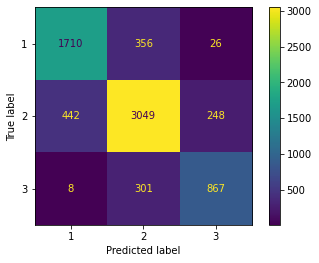

In [37]:
cm = confusion_matrix(y_test, pred, labels=rfc1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc1.classes_)
disp.plot()
plt.show()

### KNN

In [38]:
# Use sklearn's implementation
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)

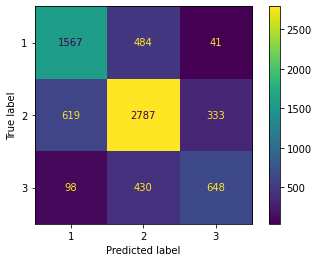

In [39]:
cm = confusion_matrix(y_test, knn_preds, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [40]:
print(f1_score(y_test, knn_preds, average='macro'))
print(f1_score(y_test, knn_preds, average='micro'))
print(f1_score(y_test, knn_preds, average='weighted'))

0.6849998803374784
0.7138575710004281
0.7125564081683983


In [41]:
param_grid = { 
    'n_neighbors': [1,3,5],
    'algorithm' :['ball_tree', 'auto', 'kd_tree', 'brute']
}
CV_rfc = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 1}

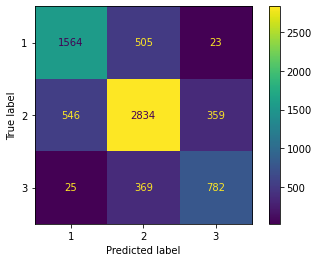

0.7231642189959318
0.7392607392607392
0.7392460951146967


In [42]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')

knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)

cm = confusion_matrix(y_test, knn_preds, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

print(f1_score(y_test, knn_preds, average='macro'))
print(f1_score(y_test, knn_preds, average='micro'))
print(f1_score(y_test, knn_preds, average='weighted'))

### Decision Trees

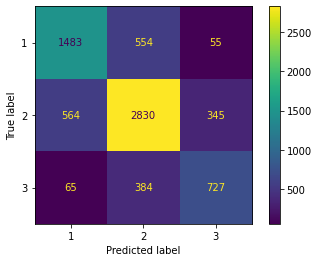

0.696943978053461
0.7192807192807193
0.7189211412208218


In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_preds = dt.predict(x_test)

cm = confusion_matrix(y_test, dt_preds, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()
print(f1_score(y_test, dt_preds, average='macro'))
print(f1_score(y_test, dt_preds, average='micro'))
print(f1_score(y_test, dt_preds, average='weighted'))

In [ ]:
param_grid = { 
    'splitter': ['random', 'best'],
    'max_features': ['', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'max_depth' :[3,7,15,25],
    'min_samples_leaf' :[3,5,9,15],
    'max_features' :[15,20,25,30],


}
CV_rfc = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 3)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 25,
 'min_samples_leaf': 3,
 'splitter': 'best'}

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 25,
 'min_samples_leaf': 3,
 'splitter': 'best'} is the best combination of hyperparameters.

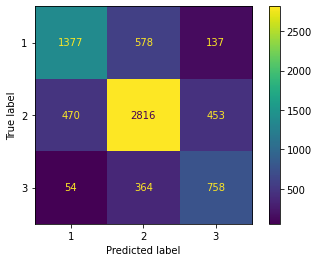

0.6805249095044269
0.7065791351505637
0.7075889509468786


In [45]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=7,max_features=25,
                           min_samples_leaf=15, splitter='best')
dt.fit(x_train, y_train)
dt_preds = dt.predict(x_test)

cm = confusion_matrix(y_test, dt_preds, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()
print(f1_score(y_test, dt_preds, average='macro'))
print(f1_score(y_test, dt_preds, average='micro'))
print(f1_score(y_test, dt_preds, average='weighted'))

### Gradient Boosting Classifier

Careful : long to run

In [46]:
clf = GradientBoostingClassifier(n_estimators=15, max_depth=15).fit(x_train, y_train)
clf.score(x_test, y_test)

0.7835022120736407

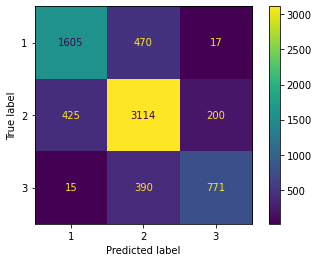

In [47]:
y2_pred = clf.predict(x_test)
cm2 = confusion_matrix(y_test, y2_pred, labels=clf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf.classes_)
disp2.plot()
plt.show()

In [48]:
print(f1_score(y_test, y2_pred, average='macro'))
print(f1_score(y_test, y2_pred, average='micro'))
print(f1_score(y_test, y2_pred, average='weighted'))

0.765320603477022
0.7835022120736406
0.7821233429189307


### Bagging


In [49]:
bg = BaggingClassifier(n_estimators=5, random_state=0)
bg.fit(x_train , y_train)

y3_pred = bg.predict(x_test)

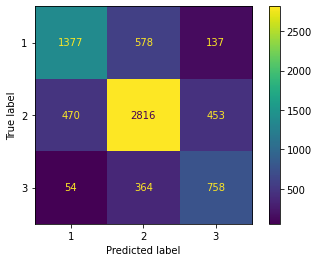

In [50]:
cm2 = confusion_matrix(y_test, y3_pred, labels=bg.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bg.classes_)
disp2.plot()
plt.show()

In [51]:
print(f1_score(y_test, y3_pred, average='macro'))
print(f1_score(y_test, y3_pred, average='micro'))
print(f1_score(y_test, y3_pred, average='weighted'))

0.731098328502313
0.7519623233908949
0.7508647217356702


## Clustering

In this part, we are going to see if clustering can be interesting for our approach. Indeed, we want in the end to be able to predict the credit score classification of a row given various data. However, it can be interesting to see if clustering algorithms can divide in a relevant manner the dataset into 3 groups, given the fact that our target attribute takes 3 distinct values.
Let's see what we find out!

### Kmeans

In [52]:
kmeans = KMeans(init='random',n_clusters=3)
kmeans.fit(dfmodel)
dfmodel[kmeans.labels_==0].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,mnth_sin,mnth_cos
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,...,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3.705000e+03
mean,35.769771,126725.557814,10514.106246,3.842915,4.582456,8.709582,2.223752,13.470985,7.773865,3.329825,...,0.067476,0.063968,0.075574,0.060189,0.072874,0.067746,0.066397,0.069096,0.403516,-1.039055e-01
std,10.902580,21491.701223,1792.720324,2.295207,1.668947,4.830762,1.558914,8.380482,4.999102,2.848352,...,0.250879,0.244728,0.264350,0.237869,0.259965,0.251344,0.249008,0.253651,0.492789,7.640423e-01
min,14.000000,98436.600000,6884.799215,-1.000000,0.000000,1.000000,0.000000,0.000000,-6.280000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-1.000000e+00
25%,27.000000,108171.630000,9015.652514,2.000000,3.000000,5.000000,1.000000,7.000000,3.910000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.660254e-01
50%,35.000000,122915.960000,10190.249319,4.000000,5.000000,8.000000,2.000000,12.000000,7.570000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.123234e-17
75%,45.000000,140276.800000,11584.510000,5.000000,6.000000,11.000000,3.000000,19.000000,10.760000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866025,8.660254e-01
max,56.000000,179987.280000,15136.696667,9.000000,8.000000,20.000000,7.000000,35.000000,25.970000,86.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [53]:
dfmodel[kmeans.labels_==1].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,mnth_sin,mnth_cos
count,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,...,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000
mean,32.945284,70091.895675,5825.257104,5.497926,5.584348,14.714916,3.530569,21.559064,10.506210,5.935251,...,0.063411,0.065552,0.065953,0.070635,0.067559,0.075585,0.068094,0.068763,0.399649,-0.111885
std,10.713499,13425.513718,1132.329706,2.493629,2.008064,8.477626,2.441495,14.253659,6.782408,3.998271,...,0.243718,0.247514,0.248217,0.256232,0.251004,0.264351,0.251923,0.253067,0.490592,0.766285
min,14.000000,47178.460000,3357.193280,0.000000,0.000000,1.000000,0.000000,0.000000,-6.370000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-1.000000
25%,24.000000,59086.620000,4877.030000,4.000000,4.000000,8.000000,2.000000,11.000000,5.400000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.866025
50%,32.000000,68763.140000,5723.356667,6.000000,6.000000,14.000000,3.000000,19.000000,9.520000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,-0.500000
75%,41.000000,81166.860000,6727.770000,7.000000,7.000000,20.000000,5.000000,28.000000,14.970000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866025,0.866025
max,56.000000,98197.740000,8417.002500,10.000000,11.000000,34.000000,32.000000,62.000000,35.830000,63.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
dfmodel[kmeans.labels_==2].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,mnth_sin,mnth_cos
count,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,...,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,1.684600e+04
mean,32.665915,24226.010043,2015.939006,5.643239,5.743500,15.696248,3.850410,22.802149,10.964460,6.320848,...,0.072302,0.060964,0.069571,0.064110,0.061498,0.066069,0.069690,0.066603,0.404060,-1.075983e-01
std,10.607193,10767.388104,907.258118,2.572636,2.076007,8.947300,2.525607,15.316593,7.029232,4.105024,...,0.258995,0.239271,0.254431,0.244956,0.240249,0.248410,0.254632,0.249341,0.492276,7.634601e-01
min,14.000000,7005.930000,319.556250,-1.000000,0.000000,1.000000,0.000000,0.000000,-6.440000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-1.000000e+00
25%,24.000000,15915.915000,1313.115000,4.000000,4.000000,8.000000,2.000000,11.000000,5.720000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.660254e-01
50%,32.000000,20861.495000,1799.283750,6.000000,6.000000,15.000000,4.000000,20.000000,9.790000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.123234e-17
75%,41.000000,33287.120000,2765.008333,8.000000,7.000000,22.000000,6.000000,30.000000,15.790000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866025,8.660254e-01
max,100.000000,47091.420000,4167.332500,10.000000,11.000000,34.000000,39.000000,62.000000,36.970000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [55]:
kmeans.inertia_ 

5083364948984.349

### Kmeans ++

Let us first see how the number of clusters affects the performance; the best model is one that has both low inertia and a low number of clusters. However, there is a tradeoff between those 2 quantities.

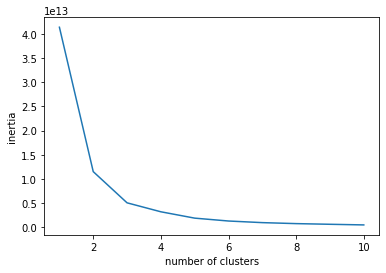

In [86]:
inertia = []

clusters= []

for k in range(1,11):
    
    kmeans_plus_2 = KMeans(n_clusters=k)
    kmeans_plus_2.fit(dfmodel)
    inertia.append(kmeans_plus_2.inertia_)
    clusters.append(k)

plt.plot(clusters,inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

we can use here the elbow method, i.e choosing the value for k where inertia begins to slow. Here, k=3 corresponds to that value, therefore we will keep it as our nulber 

In [56]:
kmeans_plus = KMeans(n_clusters=3)
kmeans_plus.fit(dfmodel)
kmeans_plus.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
dfmodel[kmeans_plus.labels_ == 0].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,mnth_sin,mnth_cos
count,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,...,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,16846.000000,1.684600e+04
mean,32.665915,24226.010043,2015.939006,5.643239,5.743500,15.696248,3.850410,22.802149,10.964460,6.320848,...,0.072302,0.060964,0.069571,0.064110,0.061498,0.066069,0.069690,0.066603,0.404060,-1.075983e-01
std,10.607193,10767.388104,907.258118,2.572636,2.076007,8.947300,2.525607,15.316593,7.029232,4.105024,...,0.258995,0.239271,0.254431,0.244956,0.240249,0.248410,0.254632,0.249341,0.492276,7.634601e-01
min,14.000000,7005.930000,319.556250,-1.000000,0.000000,1.000000,0.000000,0.000000,-6.440000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-1.000000e+00
25%,24.000000,15915.915000,1313.115000,4.000000,4.000000,8.000000,2.000000,11.000000,5.720000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.660254e-01
50%,32.000000,20861.495000,1799.283750,6.000000,6.000000,15.000000,4.000000,20.000000,9.790000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.123234e-17
75%,41.000000,33287.120000,2765.008333,8.000000,7.000000,22.000000,6.000000,30.000000,15.790000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866025,8.660254e-01
max,100.000000,47091.420000,4167.332500,10.000000,11.000000,34.000000,39.000000,62.000000,36.970000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [58]:
dfmodel[kmeans_plus.labels_ == 0].Credit_Score.value_counts()

2    8806
1    5588
3    2452
Name: Credit_Score, dtype: int64

In [59]:
dfmodel[kmeans_plus.labels_ == 0].Credit_Score.value_counts(normalize=True)

2    0.522735
1    0.331711
3    0.145554
Name: Credit_Score, dtype: float64

Poor: 33% Standard: 52% Good: 15%

In [65]:
dfmodel[kmeans_plus.labels_ == 1].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,mnth_sin,mnth_cos
count,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,...,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000
mean,32.945284,70091.895675,5825.257104,5.497926,5.584348,14.714916,3.530569,21.559064,10.506210,5.935251,...,0.063411,0.065552,0.065953,0.070635,0.067559,0.075585,0.068094,0.068763,0.399649,-0.111885
std,10.713499,13425.513718,1132.329706,2.493629,2.008064,8.477626,2.441495,14.253659,6.782408,3.998271,...,0.243718,0.247514,0.248217,0.256232,0.251004,0.264351,0.251923,0.253067,0.490592,0.766285
min,14.000000,47178.460000,3357.193280,0.000000,0.000000,1.000000,0.000000,0.000000,-6.370000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-1.000000
25%,24.000000,59086.620000,4877.030000,4.000000,4.000000,8.000000,2.000000,11.000000,5.400000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.866025
50%,32.000000,68763.140000,5723.356667,6.000000,6.000000,14.000000,3.000000,19.000000,9.520000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,-0.500000
75%,41.000000,81166.860000,6727.770000,7.000000,7.000000,20.000000,5.000000,28.000000,14.970000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866025,0.866025
max,56.000000,98197.740000,8417.002500,10.000000,11.000000,34.000000,32.000000,62.000000,35.830000,63.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
dfmodel[kmeans_plus.labels_ == 1].Credit_Score.value_counts()

2    4131
1    2130
3    1214
Name: Credit_Score, dtype: int64

In [67]:
dfmodel[kmeans_plus.labels_ == 1].Credit_Score.value_counts(normalize=True)

2    0.552642
1    0.284950
3    0.162408
Name: Credit_Score, dtype: float64

In [68]:
dfmodel[kmeans_plus.labels_ == 2].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,mnth_sin,mnth_cos
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,...,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3.705000e+03
mean,35.769771,126725.557814,10514.106246,3.842915,4.582456,8.709582,2.223752,13.470985,7.773865,3.329825,...,0.067476,0.063968,0.075574,0.060189,0.072874,0.067746,0.066397,0.069096,0.403516,-1.039055e-01
std,10.902580,21491.701223,1792.720324,2.295207,1.668947,4.830762,1.558914,8.380482,4.999102,2.848352,...,0.250879,0.244728,0.264350,0.237869,0.259965,0.251344,0.249008,0.253651,0.492789,7.640423e-01
min,14.000000,98436.600000,6884.799215,-1.000000,0.000000,1.000000,0.000000,0.000000,-6.280000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-1.000000e+00
25%,27.000000,108171.630000,9015.652514,2.000000,3.000000,5.000000,1.000000,7.000000,3.910000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.660254e-01
50%,35.000000,122915.960000,10190.249319,4.000000,5.000000,8.000000,2.000000,12.000000,7.570000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.123234e-17
75%,45.000000,140276.800000,11584.510000,5.000000,6.000000,11.000000,3.000000,19.000000,10.760000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866025,8.660254e-01
max,56.000000,179987.280000,15136.696667,9.000000,8.000000,20.000000,7.000000,35.000000,25.970000,86.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [76]:
dfmodel[kmeans_plus.labels_ == 2].Credit_Score.value_counts()

2    1990
3    1175
1     540
Name: Credit_Score, dtype: int64

In [75]:
dfmodel[kmeans_plus.labels_ == 2].Credit_Score.value_counts(normalize=True)

2    0.537112
3    0.317139
1    0.145749
Name: Credit_Score, dtype: float64

### Recap

Low income class: P 33% S 52%, G 15% on average
 
Middle class: P 29%  S 55% G 16 %

High income class: P 13% S 55% G 32%

The results of this KMean clustering show a clear separation btw middle-low class and high income class, with proportion of good and poor Credit Scores that completely change. Standard is alaways around 53%. However, the distinction btw low income class and average income class is less clear. Maybe only 2 clusters?

<AxesSubplot:>

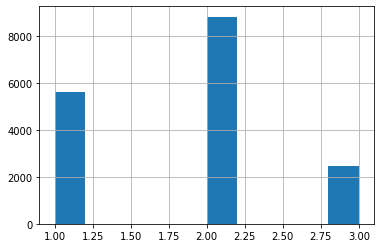

In [71]:
dfmodel[kmeans_plus.labels_ == 0]["Credit_Score"].hist()


<AxesSubplot:>

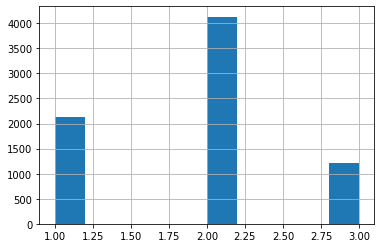

In [72]:
dfmodel[kmeans_plus.labels_ == 1]["Credit_Score"].hist()

<AxesSubplot:>

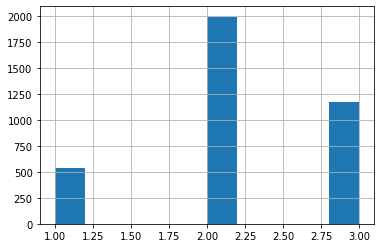

In [73]:
dfmodel[kmeans_plus.labels_ == 2]["Credit_Score"].hist()

even though this clustering is interesting, we have to admit that we obtain a really high inertia, that can nuance the quality of our results.

In [81]:
kmeans_plus.inertia_

5083364948984.35